In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [2]:
heart_data=pd.read_csv('/content/heart_disease_data.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
heart_data.shape

(303, 14)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


for i in range(len(info)):
    print(heart_data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [11]:
x= heart_data.drop(columns='target',axis=1)
y= heart_data['target']


In [12]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [14]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


LOGISTIC REGRESSION

In [22]:
# lr_model=LogisticRegression(max_iter=300)
lr_model = LogisticRegression(solver='saga', max_iter=300)


In [23]:
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=300, solver='saga')

In [35]:
x_train_prediction=lr_model.predict(x_train)
lr_training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy on training data"+" "+str(lr_training_data_accuracy))

Accuracy on training data 0.7231404958677686


In [36]:
x_test_prediction=lr_model.predict(x_test)
lr_testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy on testing data"+" "+str(lr_testing_data_accuracy))

Accuracy on testing data 0.7049180327868853


SUPPORT VECTOR MACHINE

In [27]:
from sklearn import svm

sv_model = svm.SVC(kernel='linear')

In [28]:
sv_model.fit(x_train, y_train)

SVC(kernel='linear')

In [37]:
x_train_prediction=sv_model.predict(x_train)
sv_training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy on training data"+" "+str(sv_training_data_accuracy))

Accuracy on training data 0.8553719008264463


In [38]:
x_test_prediction=sv_model.predict(x_test)
sv_testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy on testing data"+" "+str(sv_testing_data_accuracy))

Accuracy on testing data 0.819672131147541


RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
x_train_prediction=rf_model.predict(x_train)
rf_training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy on training data"+" "+str(rf_training_data_accuracy))

Accuracy on training data 1.0


In [40]:
x_test_prediction=rf_model.predict(x_test)
rf_testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy on testing data"+" "+str(rf_testing_data_accuracy))

Accuracy on testing data 0.8032786885245902


In [43]:
scores = [lr_testing_data_accuracy,sv_testing_data_accuracy,rf_testing_data_accuracy]
algorithms = ["Logistic Regression","Support Vector Machine","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+" %")

The accuracy score achieved using Logistic Regression is: 70.49180327868852 %
The accuracy score achieved using Support Vector Machine is: 81.9672131147541 %
The accuracy score achieved using Random Forest is: 80.32786885245902 %


<ipython-input-46-e17cf4c7d770>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithms', y='Accuracy score', data=df, palette=['red', 'green', 'blue'])


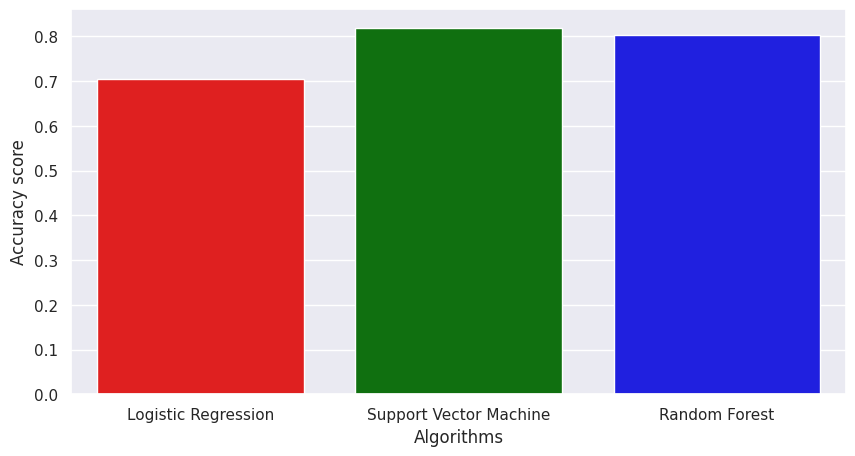

In [46]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = {'Algorithms': algorithms, 'Accuracy score': scores}
df = pd.DataFrame(data)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Algorithms', y='Accuracy score', data=df, palette=['red', 'green', 'blue'])

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()

HYBRID MODEL

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/heart_disease_data.csv')

# Assume the last column is the target and the others are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models with hyperparameter tuning
svm = SVC(probability=True)
rf = RandomForestClassifier()

# Set up hyperparameter grid for tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV for hyperparameter tuning
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models on training data
grid_svm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# Create a stacking classifier with the best models
stacking_clf = StackingClassifier(
    estimators=[('svm', grid_svm.best_estimator_), ('rf', grid_rf.best_estimator_)],
    final_estimator=LogisticRegression(max_iter=1000)
)

# Use a pipeline for scaling
pipeline = make_pipeline(StandardScaler(), stacking_clf)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate using cross-validation
accuracy = cross_val_score(pipeline, X, y, cv=5)
print(f"Stacking model cross-validated accuracy: {accuracy.mean():.2f} ± {accuracy.std():.2f}")

# Optionally, evaluate on the train set
train_accuracy = pipeline.score(X_train, y_train)
print(f"Training set accuracy: {train_accuracy:.2f}")

# Evaluate on the test set
test_accuracy = pipeline.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
predicted_accuracy = accuracy_score(y_test, y_pred)
print(f"Predicted accuracy on test set: {predicted_accuracy:.2f}")

# Display true vs. predicted labels
print("True labels:", y_test.values)
print("Predicted labels:", y_pred)



Stacking model cross-validated accuracy: 0.82 ± 0.04
Training set accuracy: 0.96
Test set accuracy: 0.87
Predicted accuracy on test set: 0.87
True labels: [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
Predicted labels: [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


Saving the trained model

In [48]:
with open('heart_model.sav', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [49]:
#loading saved model
loaded_model=pickle.load(open('heart_model.sav','rb'))